## Linear Regression 

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Ingestion [Reading the dataset]

In [211]:
data = pd.read_csv('data.csv')

In [212]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [213]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0.0


#### Analyzing the Dataset

In [214]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.563786
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496938
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


#### count  = 246 days
#### unique =  33 days

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 26.8+ KB


#### Insights :
1. Day has 246 non-null values
2. Classes has 244 non-null values

We have two null rows in dataset

In [216]:
data = data.dropna()

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 28.5+ KB


In [218]:
data.isna().count()

day            243
month          243
year           243
Temperature    243
 RH            243
 Ws            243
Rain           243
FFMC           243
DMC            243
DC             243
ISI            243
BUI            243
FWI            243
Classes        243
dtype: int64

#### [ Removed null values as we have only two null values ]

In [219]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.563786
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.496938
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


<Figure size 1440x1440 with 0 Axes>

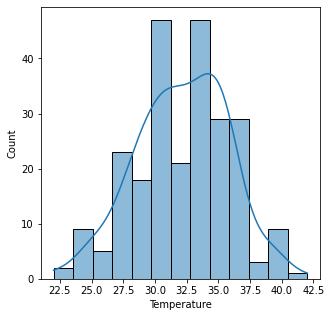

<Figure size 1440x1440 with 0 Axes>

In [223]:
sns.histplot(data = data['Temperature'], kde = True)
plt.xlabel("Temperature")
plt.figure(figsize=(20,20))

#### *Dropping Classes column as not required for Linear Regression

In [224]:
data = data.drop('Classes  ',axis=1)

In [225]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [226]:
data['Outcome'] = data['Temperature']

In [227]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Outcome
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,29
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,29
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,26
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,25
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,27


#### *Making temperature column as Outcome

In [228]:
data = data.drop('Temperature',axis = 1)
data = data.drop('year',axis = 1)

In [229]:
data = data.drop('day',axis = 1)

In [230]:
data.head()

,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Outcome
0,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,29
1,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,29
2,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,26
3,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,25
4,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,27


#### Changing Dataype to Numeric

In [231]:
data['FWI'] = data['FWI'].astype(float)
data['DC'] = data['DC'].astype(float)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    243 non-null    int64  
 1    RH      243 non-null    int64  
 2    Ws      243 non-null    int64  
 3   Rain     243 non-null    float64
 4   FFMC     243 non-null    float64
 5   DMC      243 non-null    float64
 6   DC       243 non-null    float64
 7   ISI      243 non-null    float64
 8   BUI      243 non-null    float64
 9   FWI      243 non-null    float64
 10  Outcome  243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 22.8 KB


## Exploring Dataset Correlation for Regression

In [299]:
data.corr()

,RH,Ws,FFMC,DMC,DC,ISI,BUI,FWI,Outcome
RH,1.000000,0.244048,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.651400
Ws,0.244048,1.000000,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.284510
FFMC,-0.644873,-0.166548,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.676568
DMC,-0.408519,-0.000721,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.485687
DC,-0.226941,0.079135,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.376284
ISI,-0.686667,0.008532,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.603871
BUI,-0.353841,0.031438,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.459789
FWI,-0.580957,0.032368,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.566670
Outcome,-0.651400,-0.284510,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,1.000000


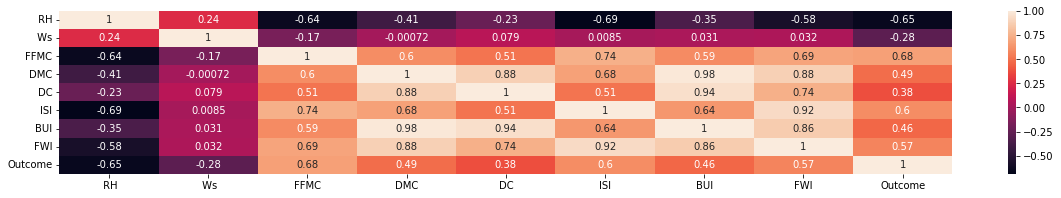

<Figure size 1440x2160 with 0 Axes>

In [300]:
sns.heatmap(data.corr(),annot = True)
plt.figure(figsize = (20,30))
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

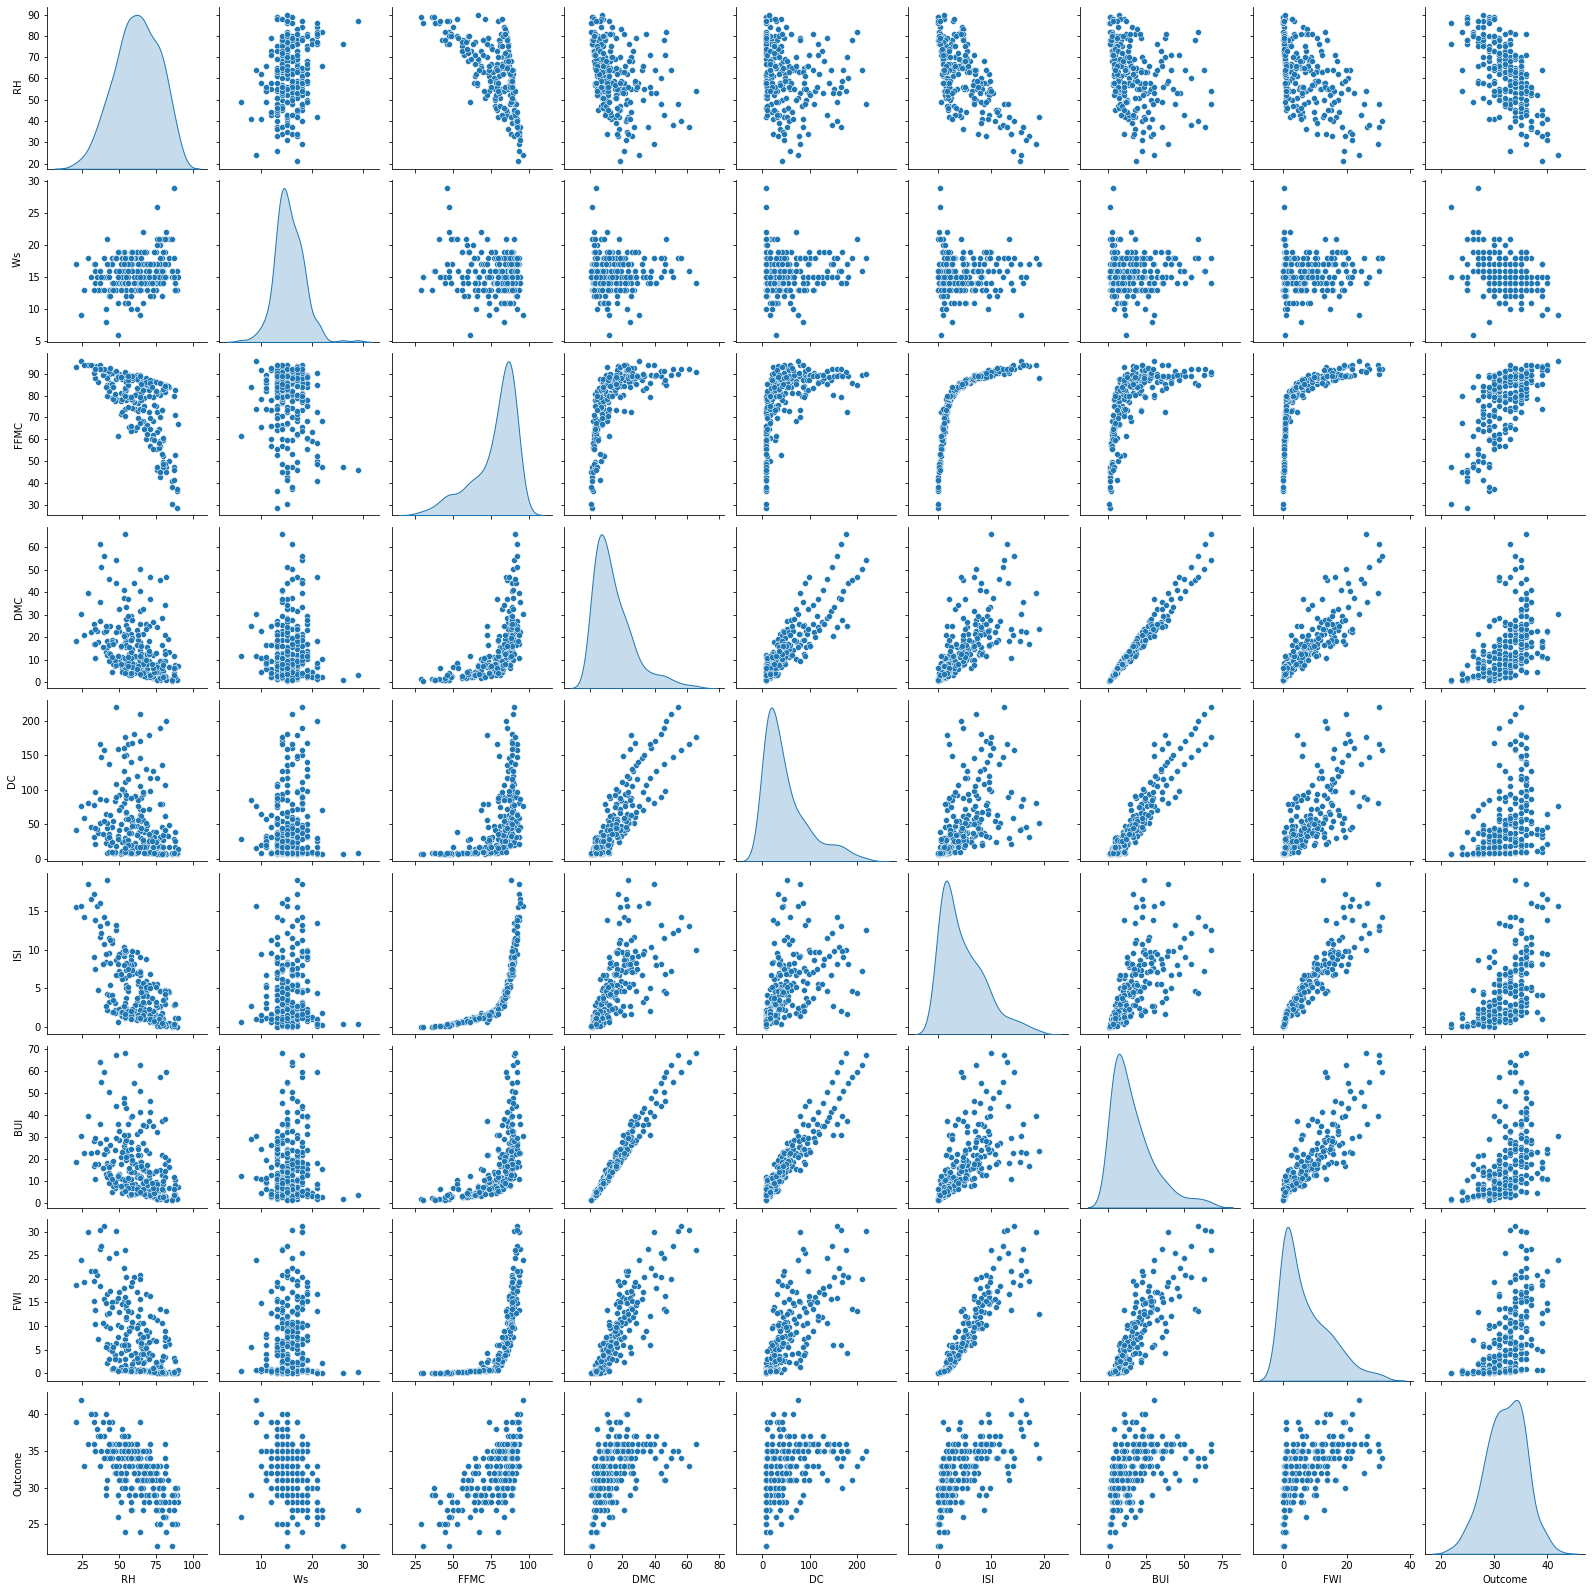

In [302]:
sns.pairplot(data=data, diag_kind='kde')

In [305]:
X = data.drop('Outcome',axis= 1)
y = data['Outcome']

In [306]:
X.head()

,RH,Ws,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,64.8,3.0,14.2,1.2,3.9,0.5


In [307]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Outcome, dtype: int64

In [308]:
data.columns


Index([' RH', ' Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Outcome'], dtype='object')

In [309]:
data = data.drop('Rain ',axis= 1)
data = data.drop('month',axis= 1)

KeyError: "['Rain '] not found in axis"

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

In [328]:
X_train

array([[ 1.2199876 , -0.22762867,  0.49499319, ..., -0.11433646,
        -0.20093835, -0.19543585],
       [ 0.1473255 , -0.98795537,  0.65052133, ...,  0.09352209,
        -0.38763567, -0.14405961],
       [ 0.34844965, -0.22762867,  0.60103511, ...,  0.09352209,
         0.43916677,  0.24126219],
       ...,
       [ 0.88478069,  0.53269803, -2.23381878, ..., -1.06124763,
        -1.03440854, -0.91470322],
       [-0.25492278,  0.15253468,  0.74242433, ...,  0.60162077,
         0.14578526,  0.47245527],
       [ 0.95182207,  2.05335143, -1.35013615, ..., -0.85338908,
        -0.99440197, -0.8890151 ]])

In [330]:
from sklearn.preprocessing import StandardScaler

In [331]:
scaler = StandardScaler()

In [332]:
X_train = scaler.fit_transform(X_train)

In [333]:
X_test = scaler.transform(X_test)

In [334]:
from sklearn.linear_model import LinearRegression

In [335]:
model1 = LinearRegression()

In [336]:
model1.fit(X_train,y_train)

LinearRegression()

In [337]:
model1.coef_

array([-1.27082782, -0.62206364,  1.28163755,  2.59693102,  1.79663776,
        0.34583243, -3.61639434, -0.44910897])

In [338]:
model1.intercept_

32.098765432098766

In [339]:
predictions = model1.predict(X_test)

In [340]:
predictions

array([32.99469722, 34.3072003 , 30.24015848, 33.60263315, 33.04124661,
       32.75886049, 31.15140445, 35.68421095, 31.09145033, 32.27160478,
       28.93370616, 38.33975552, 34.75954831, 34.52534455, 33.93267563,
       32.5082152 , 33.95068132, 26.14792055, 32.17744769, 34.28100734,
       30.37008934, 28.74432971, 34.10595607, 28.76589476, 36.06735729,
       34.32387057, 32.89392951, 33.27259017, 25.46768496, 32.93019425,
       30.2357247 , 31.87727878, 32.4568948 , 33.19127472, 32.53565395,
       32.36885491, 31.0378996 , 34.76128179, 26.93332324, 23.52266162,
       34.22861572, 34.06864584, 34.81676515, 25.57965075, 36.31810676,
       32.29660616, 30.81416445, 30.51551487, 33.90485149, 29.93332671,
       36.97270701, 35.00488105, 33.60640835, 34.22744628, 33.64085362,
       32.0965204 , 32.10883561, 33.45223422, 32.08166816, 36.7491544 ,
       32.84269916, 30.1660639 , 29.6607369 , 36.62686876, 31.64035502,
       33.3416776 , 32.99091426, 34.02366855, 35.53717863, 24.96

In [341]:
model1.score(X_test,y_test)

0.5034677942096603

<Figure size 1440x1440 with 0 Axes>

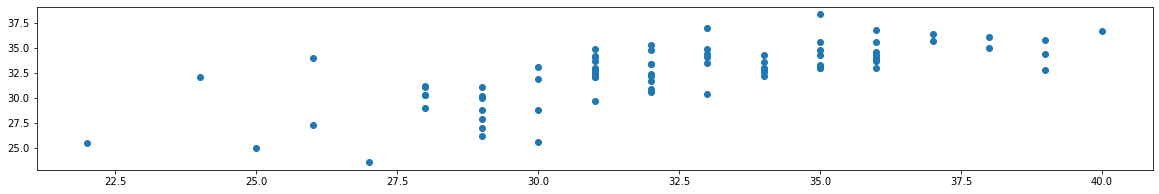

<Figure size 1440x1440 with 0 Axes>

In [342]:
plt.scatter(y_test,predictions)
plt.figure(figsize = (20,20))

In [343]:
residuals = y_test - predictions

In [273]:
residuals

24    -2.180706
6     -1.516822
152   -2.170243
233    0.570141
239   -2.920573
         ...   
242   -7.705480
5     -1.428086
56     0.289235
124    1.113513
147    2.957413
Name: Outcome, Length: 81, dtype: float64

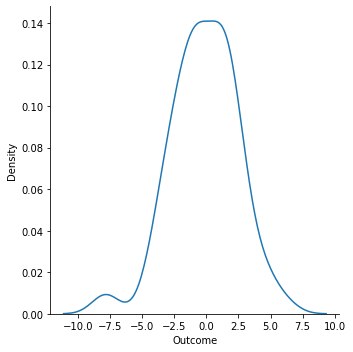

In [274]:
sns.displot(residuals,kind = "kde")

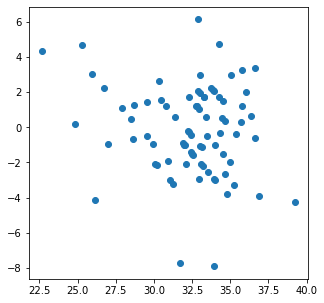

In [275]:
plt.scatter(predictions,residuals)

In [268]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,predictions))
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

6.467431400300088
2.0228953915746732
2.5431145079016964


In [279]:
from sklearn.metrics import mean_squared_error , r2_score
score = r2_score(y_test,predictions)
print(score)

0.4960712386897431


## Ridge Regression [L2 Regularization | Normalization]

In [280]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [281]:
ridge.fit(X_train,y_train)

Ridge()

In [288]:
ridge.score(X_test,y_test)

0.5214410709854391

In [290]:
predictions2 = ridge.predict(X_test)
predictions2

array([33.22694311, 34.43783833, 30.13662638, 33.5350994 , 32.83494713,
       32.99917753, 30.9895431 , 35.70485069, 31.25097573, 31.95495007,
       28.66826472, 34.89913928, 34.66530246, 34.39135968, 34.11332982,
       32.82111189, 33.86779574, 26.06491988, 32.17690593, 34.38369012,
       30.33971266, 28.59640843, 34.0095262 , 28.54151375, 36.17393141,
       34.50856393, 33.06594303, 33.37852985, 26.12265339, 32.79933135,
       30.13149603, 32.03359473, 32.53736711, 33.42633762, 32.48864426,
       32.34586576, 30.84236445, 34.65792097, 26.7926615 , 22.7110007 ,
       34.22928695, 33.8667339 , 34.81286797, 25.37593698, 36.11826666,
       32.22279536, 30.7642321 , 30.5803741 , 33.71783398, 29.52056711,
       36.53959205, 34.94791467, 33.68516186, 34.58344086, 33.70558182,
       32.30393683, 32.30476847, 33.30576487, 31.95804325, 36.58673576,
       32.70883971, 29.73718932, 29.54095256, 36.64186253, 31.45115239,
       33.14272582, 32.97038221, 33.91067507, 35.26779928, 24.89

In [291]:
residuals2 = y_test - predictions2
residuals2

24    -2.226943
6     -1.437838
152   -2.136626
233    0.464901
239   -2.834947
         ...   
242   -7.733634
5     -1.389626
56     0.190136
124    1.064317
147    3.034550
Name: Outcome, Length: 81, dtype: float64

In [294]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,predictions2))
print(mean_absolute_error(y_test,predictions2))
print(np.sqrt(mean_squared_error(y_test,predictions2)))

6.141834485404982
1.9579602467698904
2.478272480056417


In [295]:
from sklearn.metrics import mean_squared_error , r2_score
score2 = r2_score(y_test,predictions2)
print(score2)

0.5214410709854391


## Lasso Regression [L1 Regression | Normalization]

In [296]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train,y_train)

Lasso()

In [297]:
Lasso.score(X_test,y_test)

0.44077777906304116

## I am getting highest score by using Ridge Model

### Score : 0.52